# Import Dependencies

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Add
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Load the Data

In [78]:
df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Drop unnecessary columns

In [79]:
df.drop('customerID', axis='columns', inplace=True)

In [80]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# Replace null values by 0 in TotalCharges column
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [31]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
missing_values = pd.to_numeric(df['TotalCharges'], errors='coerce').isnull().sum()
print("Number of null values : ",missing_values)


Number of null values :  11


In [18]:
# Show dataframe of all rows in which TotalCharges value is null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df.iloc[488].TotalCharges

' '

In [20]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [82]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [83]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [84]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [85]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Data Visualization

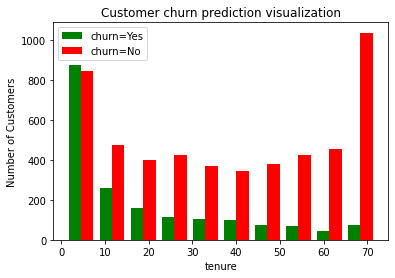

In [89]:

tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel("Number of Customers")
plt.title('Customer churn prediction visualization')

# blood_sugar_men =

plt.hist([tenure_churn_yes, tenure_churn_no],  color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()
plt.show()

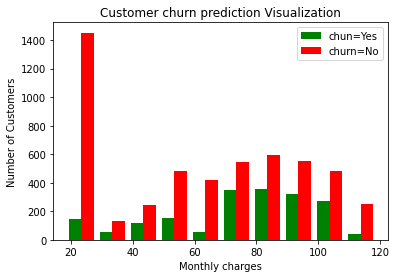

In [90]:
mchurn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('Number of Customers')
plt.title('Customer churn prediction Visualization')

plt.hist([mc_churn_yes,mchurn_no], color=['green', 'red'], label=['chun=Yes', 'churn=No'])
plt.legend()
plt.show()

# Number of Unique Values of each object Column

In [91]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')
                  

In [92]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Replace 'No internet service & no phone service' columns with no

In [93]:
df.replace('No internet service','No', inplace=True)
df.replace('No phone service','No', inplace=True)

In [94]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Covert Text classes to numbers (Yes : 1 and No : 0)

In [95]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [97]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [98]:
df['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [99]:
df.gender.unique()

array([1, 0], dtype=int64)

# One hot encodiing for categorical columns

In [100]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [101]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5444,0,0,1,0,45,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4198,1,0,1,1,52,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3746,1,0,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2780,1,0,0,0,25,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
4776,1,0,1,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [102]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [103]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [107]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Train Test Split

In [105]:
X = df.drop('Churn', axis='columns')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(5625, 26)

In [63]:
X_test.shape

(1407, 26)

In [64]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0.591549,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,1,0,1,0,0.760563,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,0,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,1,0,1,1,0.760563,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [108]:


model = Sequential()

model.add(Dense(64, input_shape=(26,), activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy']
             )

h = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.4573 - accuracy: 0.7815
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8014
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8057
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8100
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4052 - accuracy: 0.8075
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4028 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8121
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3984 - accuracy: 0.8172
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8140
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3926 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.2122 - accuracy: 0.9040
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2145 - accuracy: 0.9035
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.9042
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.9022
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2057 - accuracy: 0.9063
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2042 - accuracy: 0.9100
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.1995 - accuracy: 0.9061
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.1979 - accuracy: 0.9084
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.2010 - accuracy: 0.9102
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.2004 - accuracy: 

# Training Accuracy

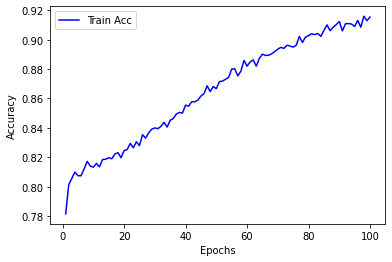

In [117]:
epochs = range(1, len(h.history['accuracy']) + 1)
plt.plot(epochs, h.history['accuracy'], 'blue', label='Train Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training Loss

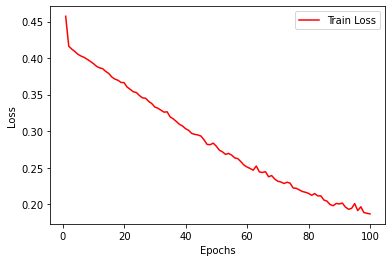

In [119]:
epochs = range(1, len(h.history['loss']) + 1)
plt.plot(epochs, h.history['loss'], 'red', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test Accuracy

In [68]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.9333 - accuracy: 0.7448


[0.9333397150039673, 0.7448471784591675]

In [70]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[9.5291512e-07],
       [6.3722956e-01],
       [9.6674091e-01],
       [5.4744214e-05],
       [6.5418362e-04]], dtype=float32)

In [72]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [73]:
y_pred[:10]

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [74]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.52      0.53      0.53       374

    accuracy                           0.74      1407
   macro avg       0.67      0.68      0.68      1407
weighted avg       0.75      0.74      0.75      1407



# Confusion Matrix

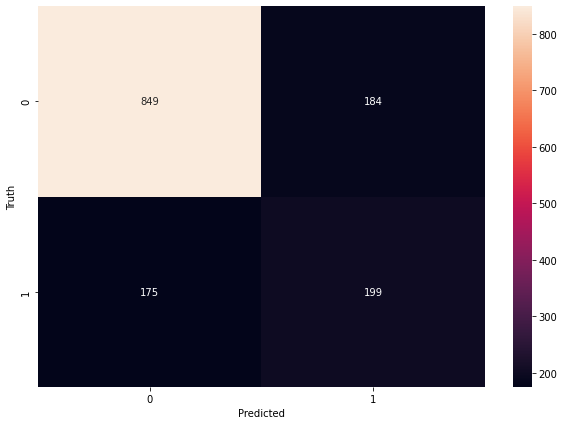

In [76]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()